In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve

In [2]:
#Reading data
df=pd.read_csv("heart.csv")

In [3]:
#Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#Printing first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#Creating Dummy variables
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [6]:
#Combining Dummy variables with dataframe
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [7]:
#Dropping original fields whose dummy variables were created
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Model Training

In [8]:
# Splitting data into target feature and other features
x = df.drop("target", axis=1)
y = df["target"]

In [9]:
# Splitting data into training and testing sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
#Creating dictionaries to store accuracy and recall values
accuracy_values={}
recall_values={}

## Logistic Regression

In [11]:
#Creating the logistic regression model
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\Users\anjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#Predicting/testing the Logistic Regression model
y_pred_logistic=logistic_model.predict(x_test)

In [29]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_logistic))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_logistic))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_logistic))

Accuracy score : 0.885
Recall score   : 0.844
F1 score       : 0.885


In [14]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Logistic_Regression"]=accuracy_score(y_test,y_pred_logistic)*100
recall_values["Logistic_Regression"]=recall_score(y_test,y_pred_logistic)*100

## Random Forest Classifier

In [15]:
#Creating the Random Forest Classifier model
np.random.seed(42)
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
#Predicting/testing the Random Forest Classifier model
y_pred_rfc=random_forest_model.predict(x_test)

In [28]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_rfc))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_rfc))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_rfc))

Accuracy score : 0.869
Recall score   : 0.875
F1 score       : 0.875


In [18]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Random Forest"]=accuracy_score(y_test,y_pred_rfc)*100
recall_values["Random Forest"]=recall_score(y_test,y_pred_rfc)*100

## Comparing models

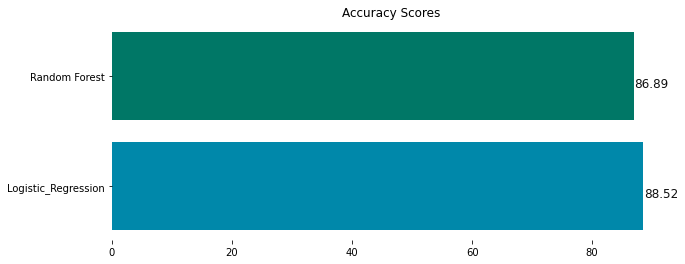

In [19]:
#Plotting Bar graph for Accuracy
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Accuracy Scores")
# Horizontal Bar Plot
ax.barh(list(accuracy_values.keys()),list(accuracy_values.values()),color=["#0088AA","#007766"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')

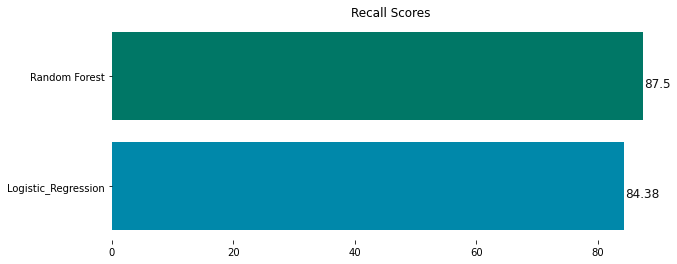

In [20]:
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Recall Scores")
# Horizontal Bar Plot
ax.barh(list(recall_values.keys()),list(recall_values.values()),color=["#0088AA","#007766"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')
 